# **Project Five - Cherry Leaves ML Pipeline**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---


## Workflow

- Data Collection
- Data Cleaning
- Data Preprocessing
- Create Pipeline
- Create Neural Network
- Fit Pipeline
- Fit Model
- Evaluate Model
- Predict Live Data

---

## Import list:

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/P-Five-Mildew/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/P-Five-Mildew'

---

### Set Random Seed

In [4]:
# To allow reproducibility - set seed
SEED = 25

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

---

### Import and Install

In [5]:
# Install tensorflow
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (645.0 MB)
Using cached ml_dtypes-0.5.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.7 MB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [tensorflow]3 [tensorflow]]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-cpu 2.16.1 requires tensorboard<2.17,>=2.16, but you have tensorboard 2.19.0 which is incompati

##### Import List

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
sns.set_style('darkgrid')

# set seeds

random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

2025-06-03 07:48:37.029204: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Data Collection

Section 1 content

There is a data set provided by the customer, it contains 2104 images of healthy cherry leaves and 2104 images of cherry leaves containing powdery mildew.
The dataset will be accessed and downloaded from kaggle. (Insert a link here later)


In [7]:
# Install Kaggle Package
!pip install kaggle

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [kaggle]2m3/4 [kaggle]


I need to change the Kaggle configuration directory to the current working directory and set permissions for the Kaggle authentication JSON.


In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

Now that I have changed the kaggle configuration directory to the current working directory I can download the dataset and use it within Jupyter notebooks.

In [238]:
KaggleDatasetPath = "codeinstitute/cherry-leaves"
DestinationFolder = "inputs/cherry_leaves_dataset"
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

Dataset URL: https://www.kaggle.com/datasets/codeinstitute/cherry-leaves
License(s): unknown
  0%|                                               | 0.00/55.0M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 55.0M/55.0M [00:00<00:00, 927MB/s]


Now I need to extract the file from the zip file:

In [239]:
import zipfile
with zipfile.ZipFile(DestinationFolder + '/cherry-leaves.zip', 'r') as zip_ref:
    zip_ref.extractall(DestinationFolder)

os.remove(DestinationFolder + '/cherry-leaves.zip')

### Load and Explore the files

In [240]:
# List top level content:
print(os.listdir(DestinationFolder))

['cherry-leaves']


I will now access both the 'healthy' and 'powdery_mildew' folders to see what is inside.

In [241]:
# Check what subfolders exsit:
print(os.listdir(os.path.join(DestinationFolder, 'cherry-leaves')))

['healthy', 'powdery_mildew']


In [242]:
# Parent Folder
cherry_leaves_path = os.path.join(DestinationFolder, 'cherry-leaves')
print(os.listdir(cherry_leaves_path))

['healthy', 'powdery_mildew']


#### Check size of dataset

I know already the dataset is made up of 2104 healthy images and 2104 powdery_mildew images, but I will check this to make sure it is correct.

In [243]:
for category in os.listdir(cherry_leaves_path):
    category_path = os.path.join(cherry_leaves_path, category)
    if os.path.isdir(category_path):
        num_images = len(os.listdir(category_path))
        print(f'{category}: {num_images} images')

healthy: 2104 images
powdery_mildew: 2104 images


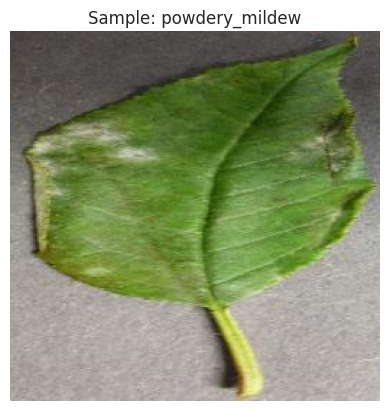

(256, 256)
{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}


In [244]:
from PIL import Image

# Set category as either 'healthy' or 'powdery_mildew'
image_class = 'powdery_mildew'
image_fodler = os.path.join(cherry_leaves_path, image_class)

# Set counter to integer between 0 and 2103
counter = 12

# Get one image
image_file = os.listdir(image_fodler)[counter]
image_path = os.path.join(image_fodler, image_file)

# Display the image
current_image = Image.open(image_path)
plt.imshow(current_image)
plt.title(f'Sample: {image_class}')
plt.axis('off')
plt.savefig('outputs/images/sample_resized_image.png', bbox_inches='tight')
plt.show()

#Check the size of the image
print(current_image.size)
print(current_image.info)


### Check image size of all files:

If all image files are the same size this is acceptable, if not then they will need to be rescaled.

##### Create function to return list of class labels

In [245]:
def return_labels(root_dir):
    label_paths = []
    # Create a loop to loop through each class (Healthy, Powdery_Mildew) and return a list
    for label in os.listdir(root_dir):
        label_path = os.path.join(root_dir, label)
        if os.path.isdir(label_path):
            label_paths.append(label_path)
    return label_paths

Unique Image Sizes: Counter({(256, 256): 4208})
Average Image Size: 256.00 x 256.00


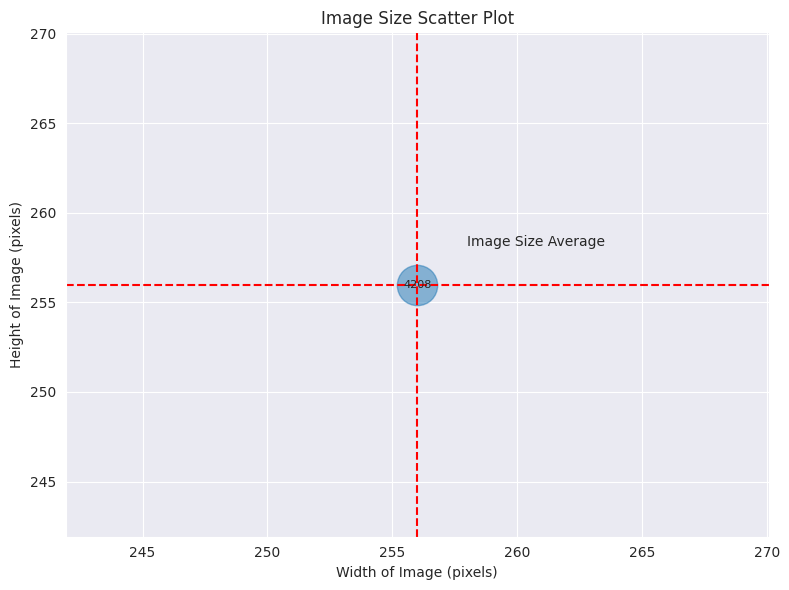

In [246]:
from collections import Counter

# Create an empty set to store a unique image size
# Sets will automatically ignore duplicates, so if the only size is 256x256 then it will only store it once.

label_paths = return_labels(cherry_leaves_path)


def check_image_size(label_dir, save_path=None):
    sizes = []
    # Create a loop to loop through each class (Healthy, Powdery_Mildew)
    for label_path in label_dir:
        # Loops through each filename inside current class/category
        for file in os.listdir(label_path):
            # Build path to image file
            file_path = os.path.join(label_path, file)
            # Open image using PIL Image and add to sizes object
            with Image.open(file_path) as img:
                sizes.append(img.size)

    sizes_count = Counter(sizes)
    print(f"Unique Image Sizes: {sizes_count}")

    all_sizes = []
    for size, count in sizes_count.items():
        all_sizes.extend([size] * count)

    # Calculate the avg width and height
    avg_width = sum(size[0] for size in all_sizes) / len(all_sizes)
    avg_height = sum(size[1] for size in all_sizes) / len(all_sizes)
    print(f'Average Image Size: {avg_width:.2f} x {avg_height:.2f}')

    # Create scatter plot
    widths = [size[0] for size in sizes_count]
    heights = [size[1] for size in sizes_count]
    counts = [count * 0.2 for count in sizes_count.values()]

    fig, axes = plt.subplots(figsize=(8,6))
    axes.scatter(x=widths, y=heights, s=counts, alpha=0.5)

    # Use avg_width and avg_height
    axes.axvline(avg_width, color='red', linestyle='--')
    axes.axhline(avg_height, color='red', linestyle='--')
    axes.text(avg_width + 2, avg_height + 2, 'Image Size Average', ha='left', va='bottom')
    for (w, h), count in sizes_count.items():
        plt.text(w, h, f'{count}', ha='center', va='center', fontsize=8)

    plt.title('Image Size Scatter Plot')
    plt.xlabel('Width of Image (pixels)')
    plt.ylabel('Height of Image (pixels)')
    plt.grid(True)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show() 

check_image_size(label_paths, 'outputs/images/scatter_plot_of_image_size.png')

The imagesize is 256x256, this will be acceptable however checking through the handbook notes, 
this will lead to a model larger than 100Mb, therefore resizing the images to 100x100 will allow for a 
smaller trained model. 

In [247]:
# Resize all images to 100x100
# Loop through all images and save their size as 100x100
for label_path in label_paths:
    for file in os.listdir(label_path):
        file_path = os.path.join(label_path, file)
        with Image.open(file_path) as img:
            resized = img.resize((100, 100))
            # Overwrites original size
            resized.save(file_path)

Unique Image Sizes: Counter({(100, 100): 4208})
Average Image Size: 100.00 x 100.00


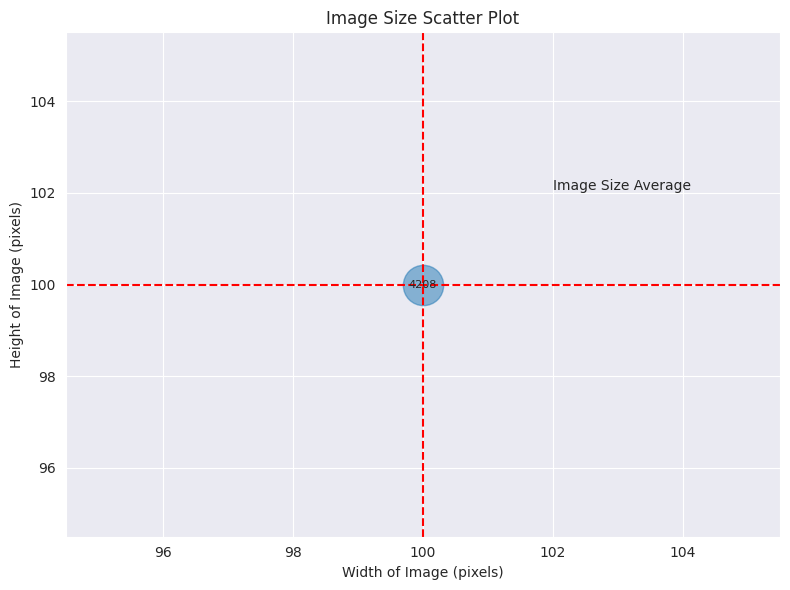

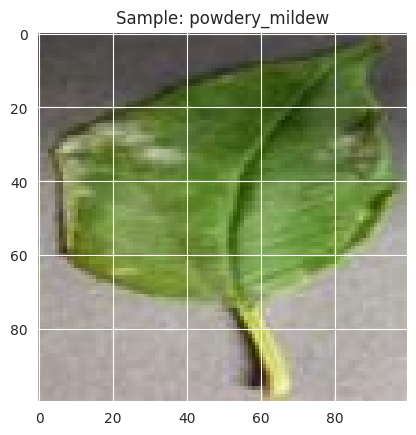

(100, 100)


In [248]:
# Check image size:
check_image_size(label_paths, 'outputs/images/scatter_plot_of_resized_images.png')

# Display the same image from before
current_image = Image.open(image_path)
plt.imshow(current_image)
plt.title(f'Sample: {image_class}')
plt.savefig('outputs/images/sample_image_resized.png')
plt.show()
print(current_image.size)

---

### Convert Dataset Into Pandas Series

Before being able to create my Train, Validation and Test sets I will need the data to be in an appropriate format to be able to split the datasets. I will need to convert the datasets into a pandas series allowing the file paths to be associated with a class label.

Create reusable functions to stop repeating code:

In [249]:
def get_image_paths_and_labels(cherry_dir):
    """Return a list of iamge path and class label from subdirectories"""
    # Store each image path with its class label
    dataset = []

    # Create a for loop to loop through all files and add a class label
    for label in os.listdir(cherry_dir):
        label_path = os.path.join(cherry_dir, label)

        # Check to make sure it is a directory 
        if os.path.join(label_path):

            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)

                # Append a tuple of, filepath, class label to list.
                dataset.append((img_path, label))
    dataset = pd.DataFrame(dataset, columns=['image_path', 'label'])
    return dataset


In [250]:
# Check to see if function is working correctly
cherry_df = get_image_paths_and_labels(cherry_leaves_path)
print(cherry_df)
print(cherry_df.shape)

                                             image_path           label
0     inputs/cherry_leaves_dataset/cherry-leaves/hea...         healthy
1     inputs/cherry_leaves_dataset/cherry-leaves/hea...         healthy
2     inputs/cherry_leaves_dataset/cherry-leaves/hea...         healthy
3     inputs/cherry_leaves_dataset/cherry-leaves/hea...         healthy
4     inputs/cherry_leaves_dataset/cherry-leaves/hea...         healthy
...                                                 ...             ...
4203  inputs/cherry_leaves_dataset/cherry-leaves/pow...  powdery_mildew
4204  inputs/cherry_leaves_dataset/cherry-leaves/pow...  powdery_mildew
4205  inputs/cherry_leaves_dataset/cherry-leaves/pow...  powdery_mildew
4206  inputs/cherry_leaves_dataset/cherry-leaves/pow...  powdery_mildew
4207  inputs/cherry_leaves_dataset/cherry-leaves/pow...  powdery_mildew

[4208 rows x 2 columns]
(4208, 2)


### Image Variability 

In [251]:
# First load image as an array

def load_iamge_as_array(df, size=(100,100)):
    image_arrays = []

    for path in df['image_path']:
        img = Image.open(path).convert('RGB')
        img = img.resize(size)
        img_array = np.array(img) / 255.0
        image_arrays.append(img_array)

    return np.array(image_arrays)

In [252]:
image_data = load_iamge_as_array(cherry_df)
print('All Image Shape:', image_data.shape)

All Image Shape: (4208, 100, 100, 3)


In [253]:
# Check shape of each class 
healthy_df = cherry_df[cherry_df['label'] == 'healthy']
powdery_mildew_df = cherry_df[cherry_df['label'] == 'powdery_mildew']

# Convert to array
healthy_df = load_iamge_as_array(healthy_df)
powdery_mildew_df = load_iamge_as_array(powdery_mildew_df)

# Print Shapes
print('Healthy Leaf Shape:', healthy_df.shape)
print('Powdery Mildew Leaf Shape:', powdery_mildew_df.shape)

Healthy Leaf Shape: (2104, 100, 100, 3)
Powdery Mildew Leaf Shape: (2104, 100, 100, 3)


In [ ]:
def image_variability_within_class(images, title, save_path=None):
    # Find average
    avg_image = np.average(images, axis=0)
    std_image = np.std(images, axis=0)

    def normalise_iamges(img):
        return (img - img.min()) / (img.max() - img.min()) if img.max() > img.min() else img
    
    avg_image_norm = normalise_iamges(avg_image)
    std_image_norm = normalise_iamges(std_image)

    print(f'\n{title} Image Average:')
    print('Min:', avg_image.min())
    print('Max:', avg_image.max())
    print('Mean:', avg_image.mean())

    print(f'\n {title} Standard Deviation:')
    print('Min:', std_image.min())
    print('Max:', std_image.max())
    print('Mean:', std_image.mean())

    # Plot

    fig, axes = plt.subplots(1, 2, figsize=(10,6))

    axes[0].imshow(avg_image_norm, cmap='gray')
    axes[0].set_title(f'Average {title} images')
    axes[0].axis('off')

    axes[1].imshow(std_image_norm, cmap='viridis')
    axes[1].set_title(f'Average Variability for {title} images')
    axes[1].axis('off')

    plt.suptitle(f'Variability within {title} Images')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()

#### Variability within Healthy Cherry Leaves


Healthy Image Average:
Min: 0.28117870722433486
Max: 0.7214698426899325
Mean: 0.5293802632396439

 Healthy Standard Deviation:
Min: 0.07679453775690867
Max: 0.22766546020940012
Mean: 0.14562575994885668


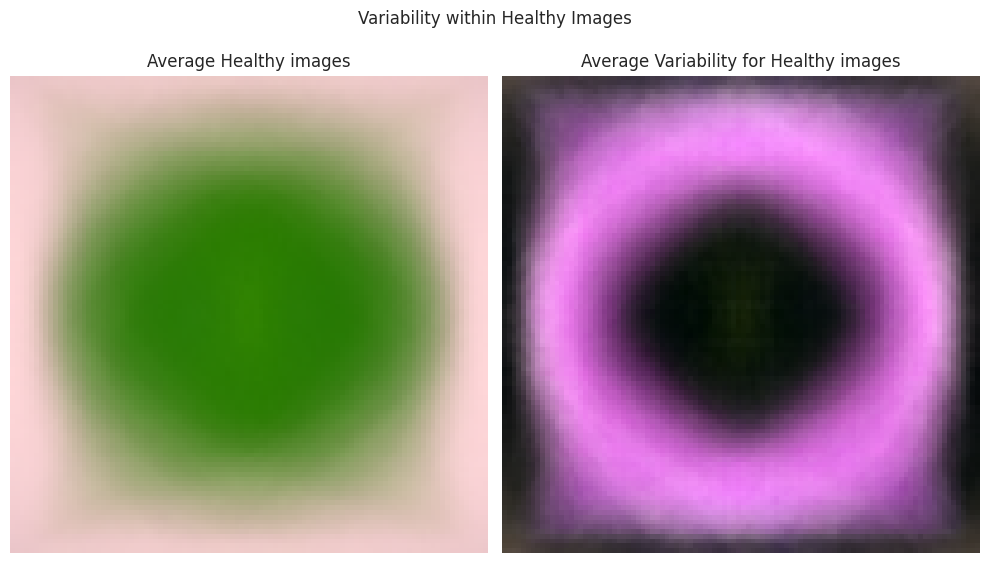

In [255]:
image_variability_within_class(healthy_df, 'Healthy', 'outputs/images/variability_within_healthy_images.png')


Powdery Mildew Image Average:
Min: 0.30501192872586363
Max: 0.5304126593603219
Mean: 0.4484467673152913

 Powdery Mildew Standard Deviation:
Min: 0.11345413487504026
Max: 0.18025738398602104
Mean: 0.14091235017716958


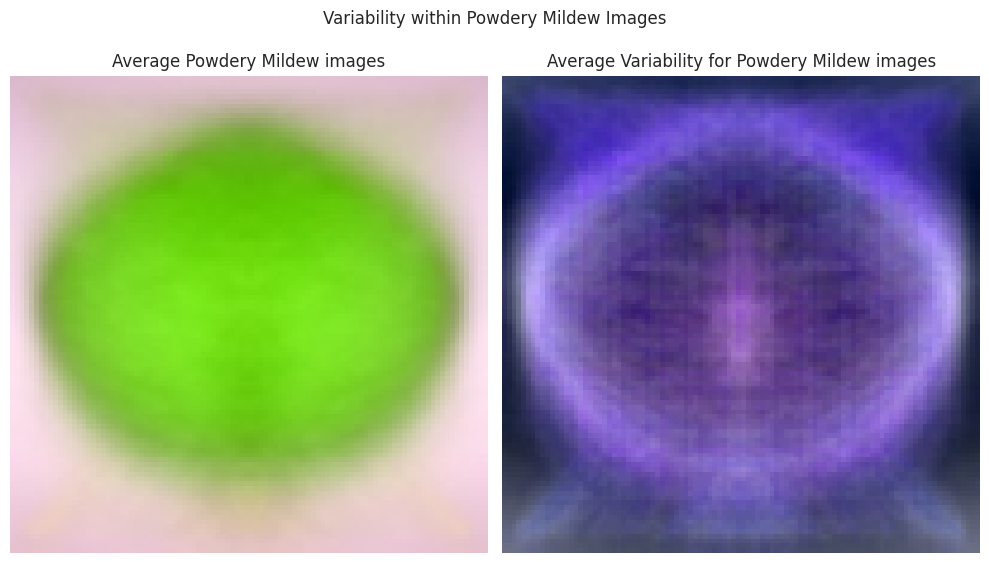

In [256]:
image_variability_within_class(powdery_mildew_df, 'Powdery Mildew', 'outputs/images/variability_within_powdery_mildew_images.png')

### Standard Deviation 

When trying to perform visual differentiation analytics on the images, the images are too low contrast to see the difference so need to be normlaised.

In [ ]:
def std_between_img_classes(healthy_images, powdery_mildew_images, save_path=None):
    
    # Find std
    std_healthy = np.std(healthy_images, axis=0)
    std_powdery_mildew = np.std(powdery_mildew_images, axis=0)

    # Calculate the difference between images
    img_std_diff = np.abs(std_healthy - std_powdery_mildew)

    # Normalise Images
    def normalise_images(img):
        return (img - img.min()) / (img.max() - img.min()) if img.max() > img.min() else img
    
    std_healthy_norm = normalise_images(std_healthy)
    std_powdery_mildew_norm = normalise_images(std_powdery_mildew)
    img_std_diff_norm = normalise_images(img_std_diff)

    # Print std values 
    print('\nHealthy Leaf:')
    print('Min:', std_healthy.min(), 'Max:', std_healthy.max(), 'Mean:', std_healthy.mean())
    print('\nPowdery Mildew Leaf std:')
    print('Min:',std_powdery_mildew.min(), 'Max:', std_powdery_mildew.max(), 'Mean:', std_powdery_mildew.mean())
    print('\nstd Difference between classes:')
    print('Min:',img_std_diff.min(), 'Max:', img_std_diff.max(), 'Mean:', img_std_diff.mean())

    # Plot 
    fig, axes = plt.subplots(1,3, figsize=(12,8))

    axes[0].imshow(std_healthy_norm, cmap='gray')
    axes[0].set_title('Healthy Leaf Standard Deviation')
    axes[0].axis('off')

    axes[1].imshow(std_powdery_mildew_norm, cmap='gray')
    axes[1].set_title('Powdery Mildew Leaf Standard Deviation')
    axes[1].axis('off')

    axes[2].imshow(img_std_diff_norm, cmap='viridis')
    axes[2].set_title('Standard Deviation of Pixels between Classes')
    axes[2].axis('off')

    plt.suptitle('Image Variability', fontsize=16)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()


Healthy Leaf:
Min: 0.07679453775690867 Max: 0.22766546020940012 Mean: 0.14562575994885668

Powdery Mildew Leaf std:
Min: 0.11345413487504026 Max: 0.18025738398602104 Mean: 0.14091235017716958

std Difference between classes:
Min: 6.72121004721693e-06 Max: 0.08664540998340495 Mean: 0.031671239920549106


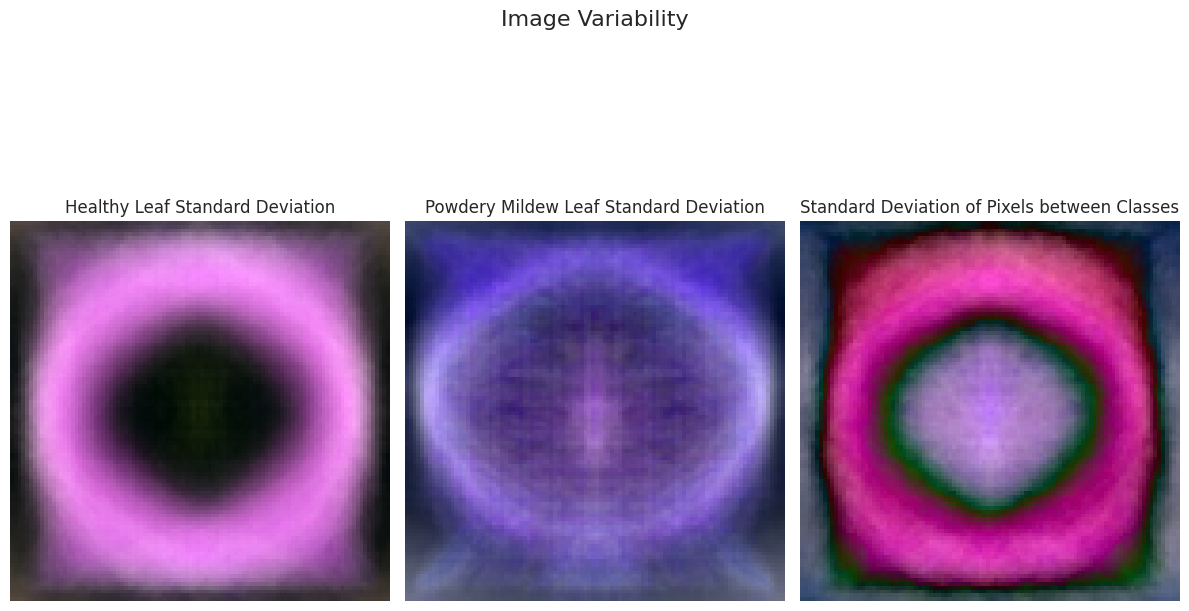

In [259]:
# Plot difference in avg and std
std_between_img_classes(healthy_df, powdery_mildew_df, 'outputs/images/std_between_img_classes.png')

---

### Image Montage

From the previous function it is concluded that the only unique image size is 256x256, therefore reshaping and resizing the data is not needed.

The client has asked for an image montage of the data, this will display a grid of images per class. In this case, "healthy" and "powdery_mildew".

In [261]:
# Image Montage Code

# Create sample of healthy cherry leaves
sample_healthy_df = cherry_df[cherry_df['label'] == 'healthy'].sample(16, random_state=25)

# Create sample of unhealthy cherry leaves
sample_mildew_df = cherry_df[cherry_df['label'] == 'powdery_mildew'].sample(16, random_state=25)

def image_montage(sample_df, nrows, ncols, figsize=(20,20), title='Image Montage', save_path=None):
    num_slots = nrows * ncols
    num_images = len(sample_df)
    
    if num_images > num_slots:
        raise ValueError(f"There are too many images for the montage grid: {num_images} images for only {num_slots} slots."
                "Reduce sample size or increase nrows/ncols.")

    if num_images < num_slots:
        raise ValueError(f"There aren't enough images for the montage grid: {num_images} images for only {num_slots} slots."
                "Increase sample size or decrease nrows/ncols.")

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for i in range(len(sample_df)):
        # Access the row by index
        row = sample_df.iloc[i]
        # Get the corresponding subpot
        ax = axes[i]

        # Open and display image
        img = Image.open(row['image_path'])
        ax.imshow(img)
        ax.set_title(row['label'], fontsize=8)
        ax.axis('off')

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(rect=(0, 0, 1, 0.95))
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
    plt.show()



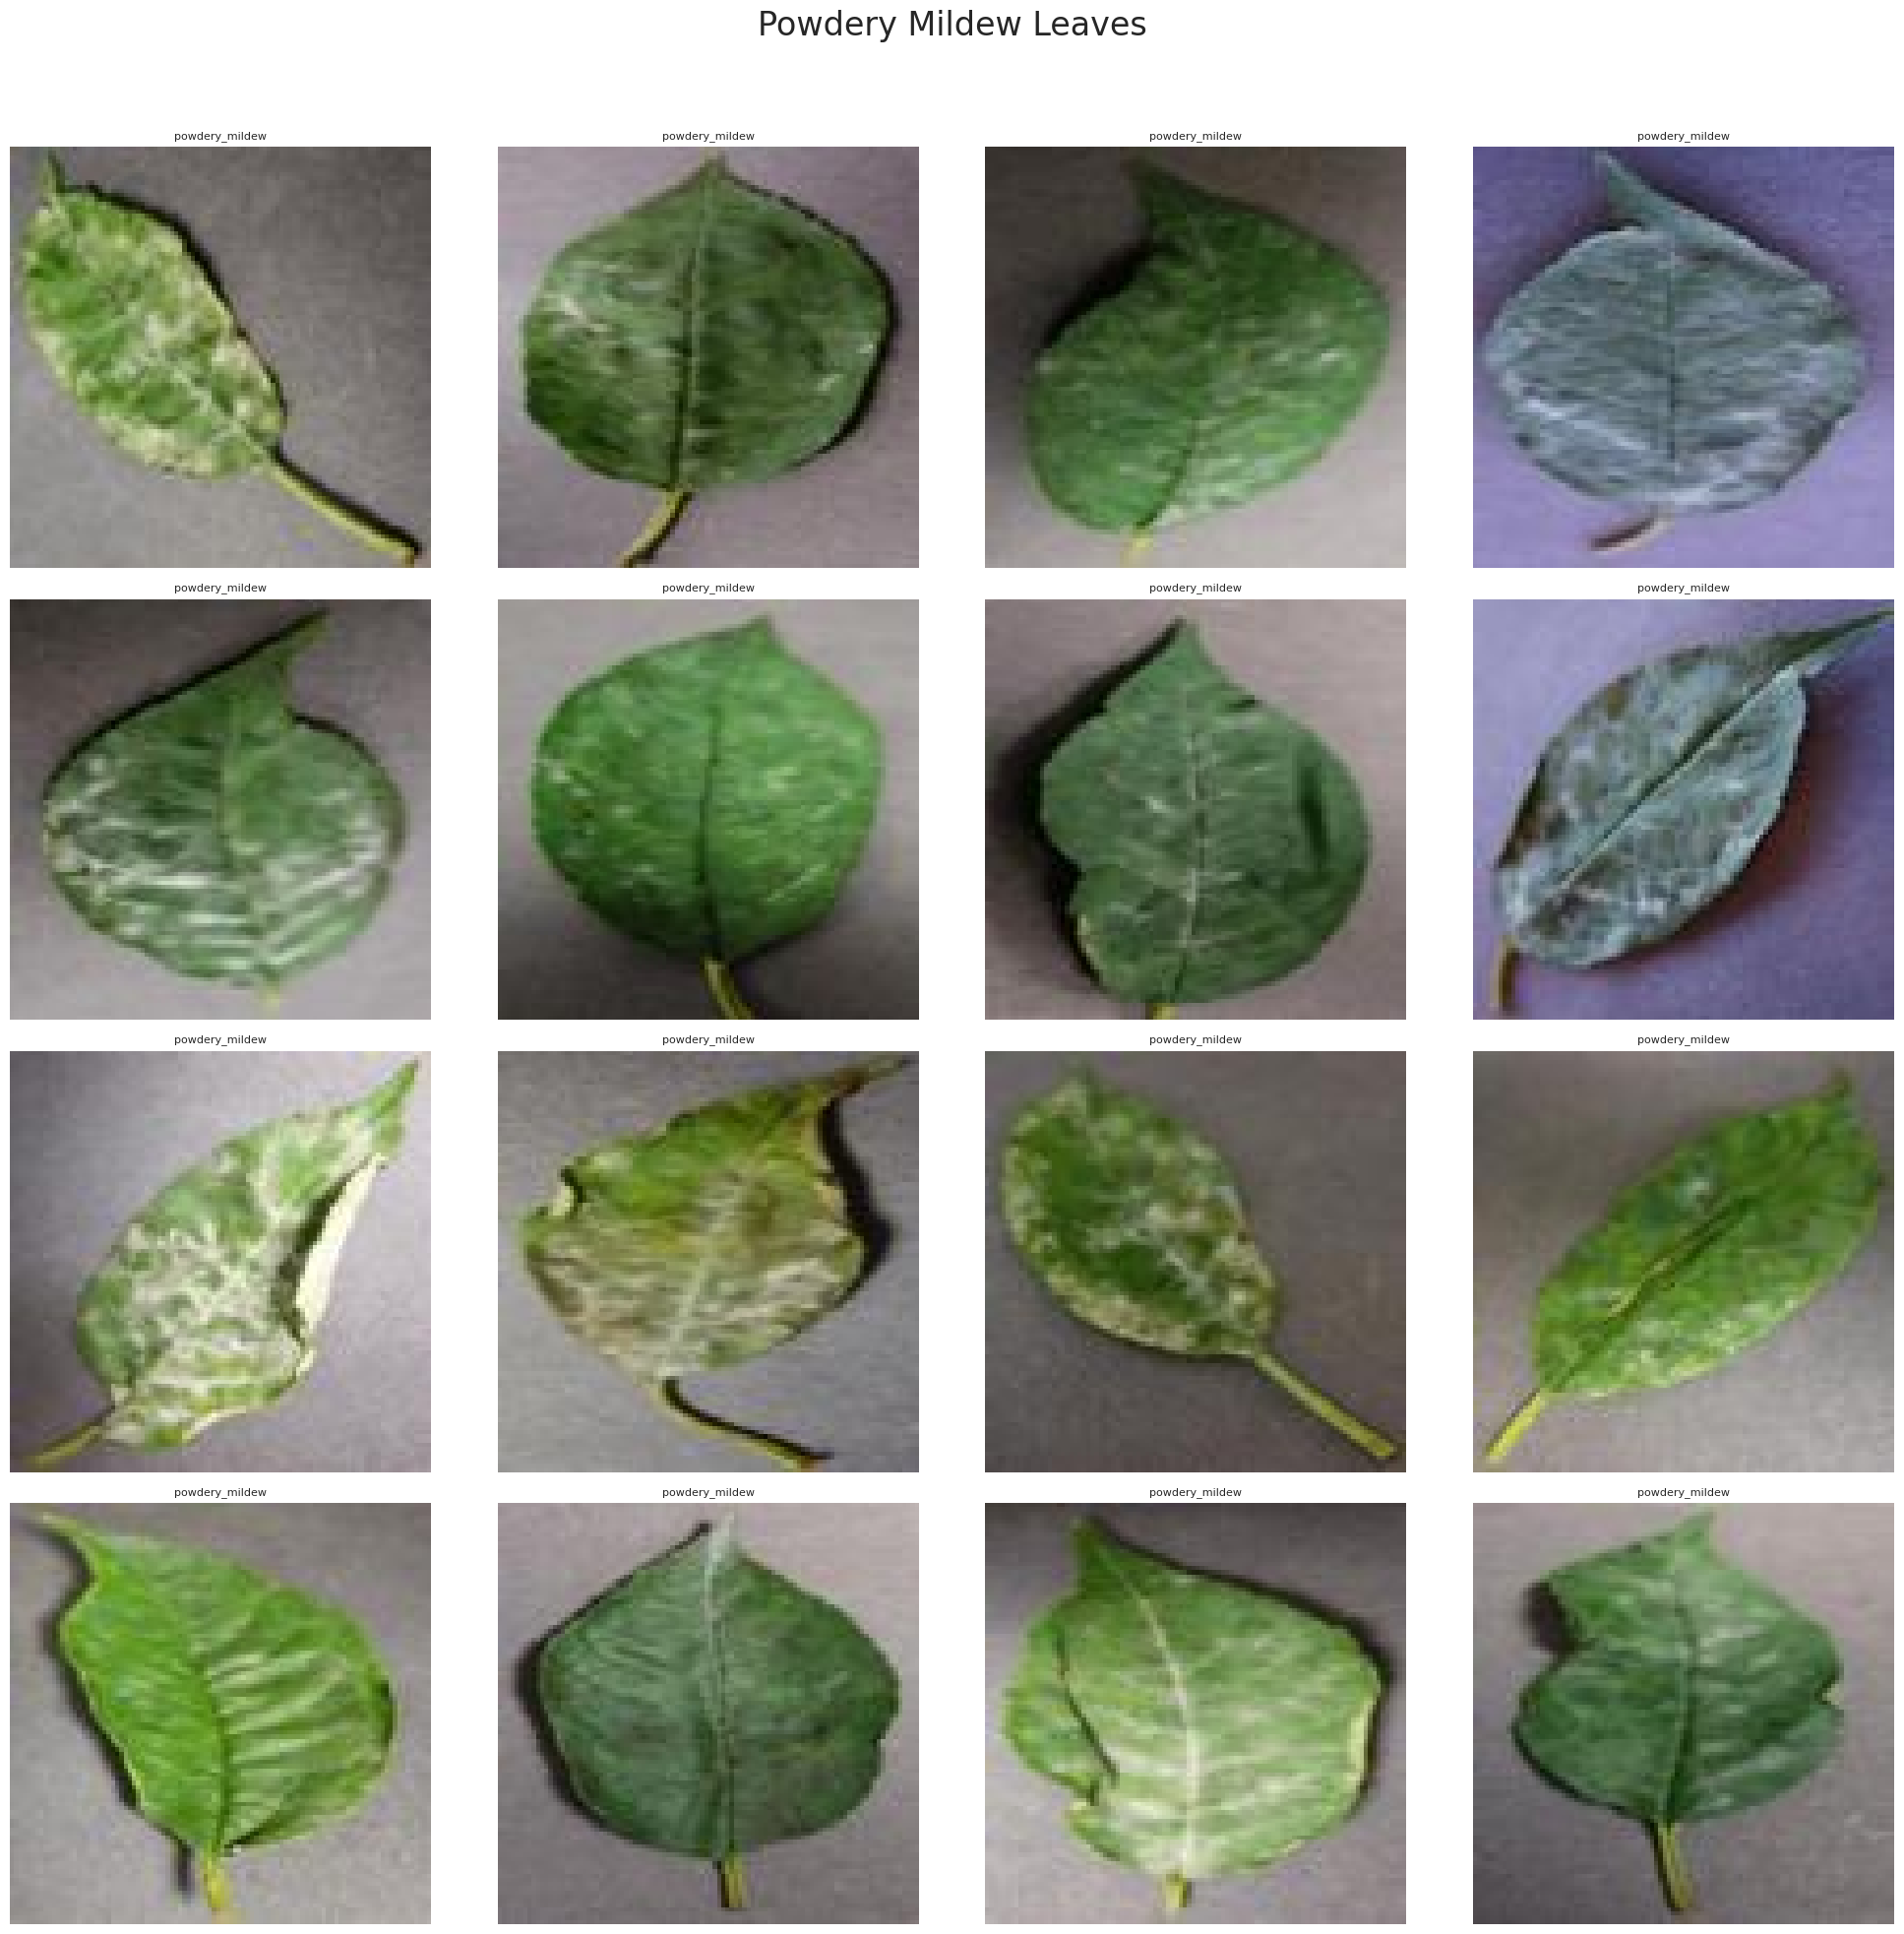

In [263]:
image_montage(sample_mildew_df, 4, 4, title='Powdery Mildew Leaves', save_path='outputs/images/powdery_mildew_img_montage.png')

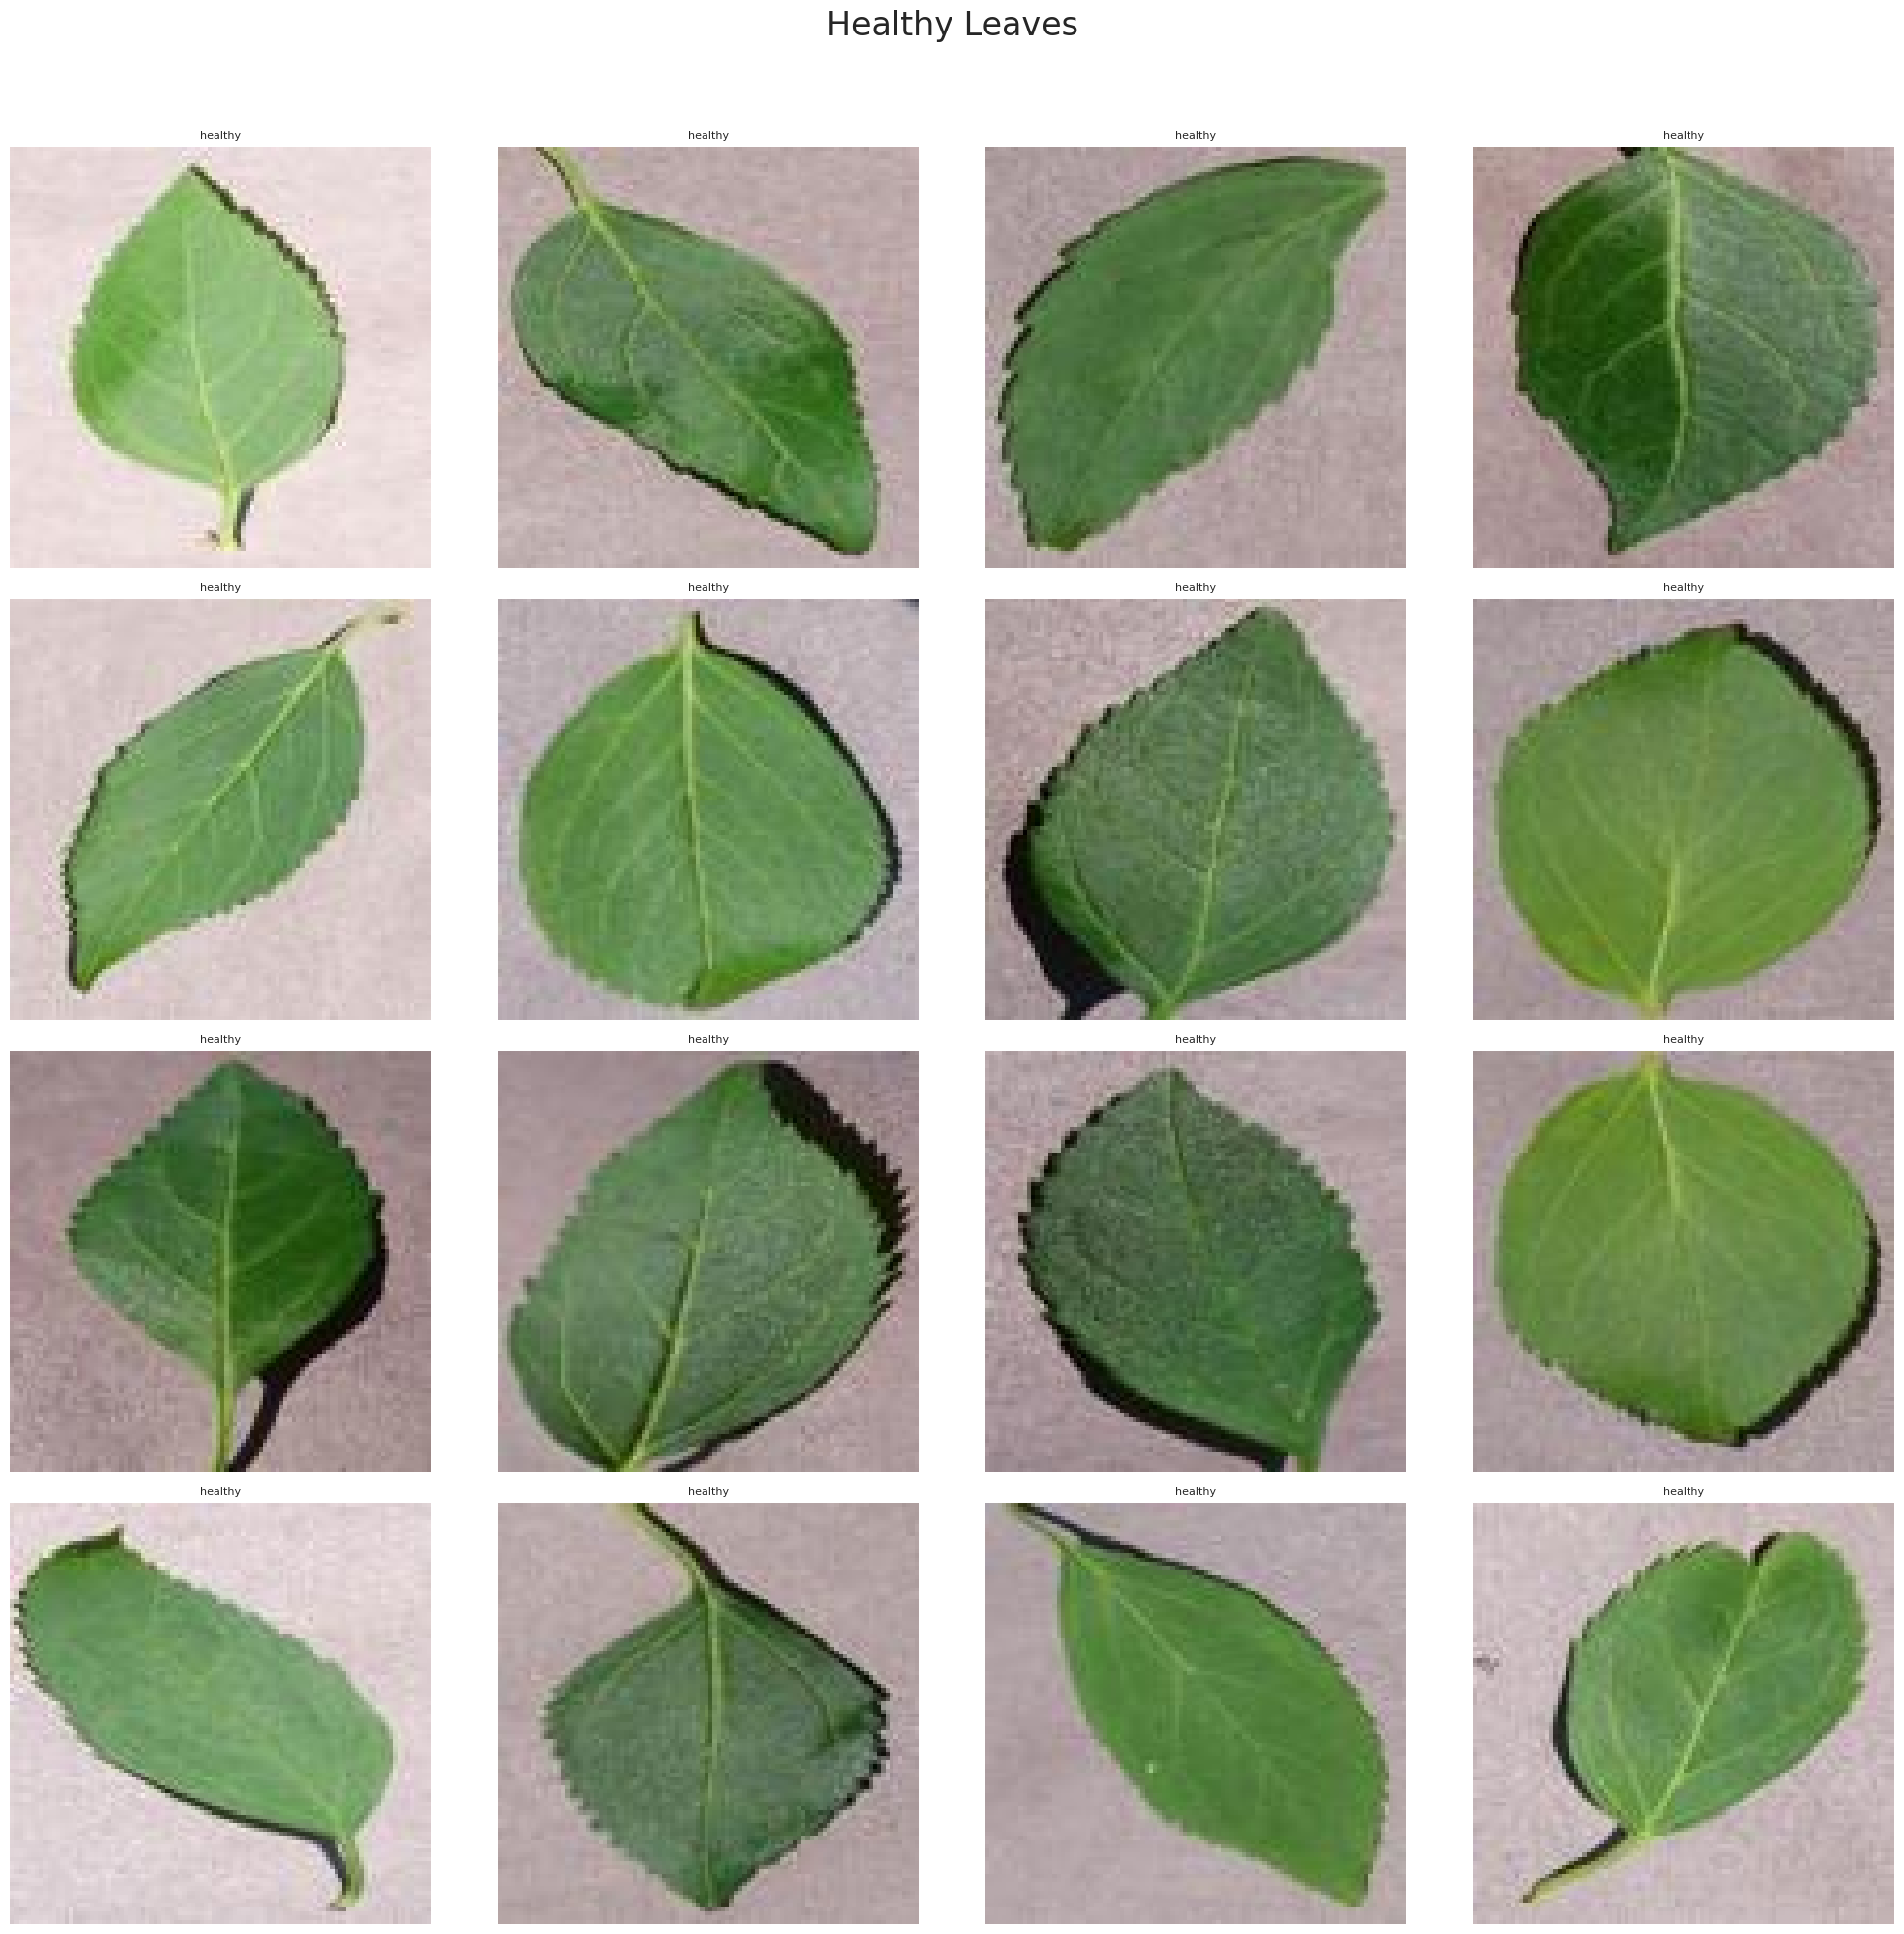

In [264]:
image_montage(sample_healthy_df, 4, 4, title='Healthy Leaves', save_path='outputs/images/healthy_img_montage.png')

---

### Train, Validation, Test Set

The data structure is made up of the parent folder: Cherry leaves with two subset folders: Healthy and Mildew. I will need to restructure the file layout and create a Train, Validation and Test set so data anaylsis can be performed.


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                cherry_df.drop(['label'], axis=1),
                                cherry_df['label'],
                                test_size=0.2,
                                random_state=SEED
                                )

X_train, X_val, y_train, y_val = train_test_split(
                                X_train,
                                y_train,
                                test_size=0.2,
                                random_state=SEED
)

print("Train Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Test Set:", X_test.shape, y_test.shape)

Train Set: (2692, 1) (2692,)
Validation Set: (674, 1) (674,)
Test Set: (842, 1) (842,)


#### Bar Plot to show distribution of Datasets

In [52]:
# Define funciton

def plot_label_distribution_for_set(y_labels, title):
    plt.Figure(figsize=(8,6))
    sns.countplot(x=y_labels)
    plt.title(f'{title} Label Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0) # Horizontal
    plt.tight_layout()
    plt.show()

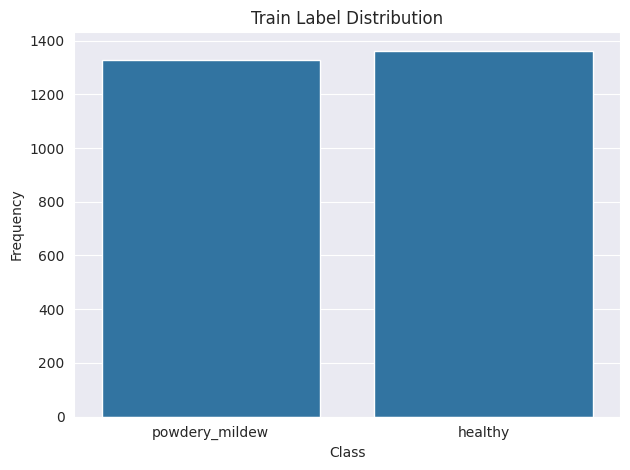

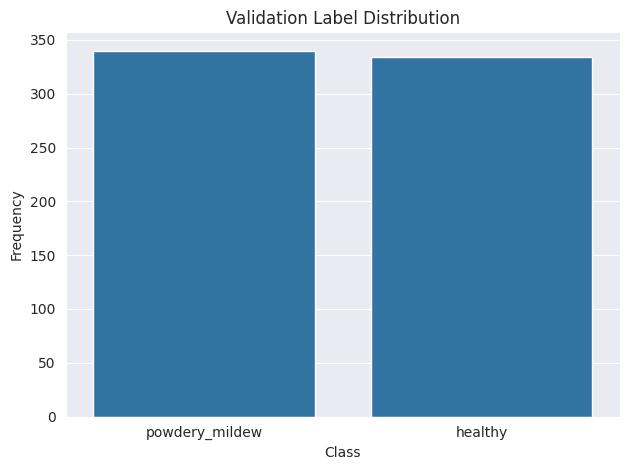

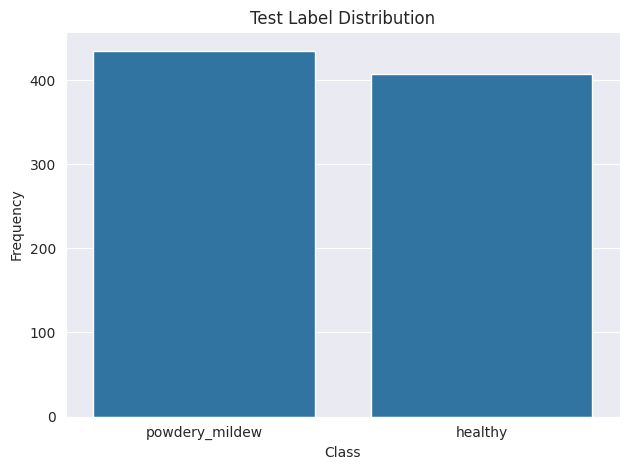

In [53]:
# Show label distribution within all datasets

plot_label_distribution_for_set(y_train, 'Train')
plot_label_distribution_for_set(y_val, 'Validation')
plot_label_distribution_for_set(y_test, 'Test')

---

### Data Processing

In [54]:
# Scaling the data

target_classes = np.unique(y_train)
print(target_classes)
num_labels = len(target_classes)
print(num_labels)

['healthy' 'powdery_mildew']
2


After checking the unique target classes it is confirmed that 'healthy' and 'powdery_mildew' are the only 2 unique target classes.
Using .len to check, we know that we have only 2 target classes and will require a binary classification model. 

In [55]:
# Inspecting first 10 rows of y_train
y_train[:10]

3875    powdery_mildew
681            healthy
3905    powdery_mildew
2761    powdery_mildew
397            healthy
2569    powdery_mildew
3216    powdery_mildew
1614           healthy
1072           healthy
475            healthy
Name: label, dtype: object

#### Import tensorflow and keras.utils

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

Using LabelEncoder(), I am converting all my string labels/classes into integers across all sets.

In [57]:
# Encode labels to integers

# Create label encoder to keep consistency
label_encoder = LabelEncoder()

# Create encoded versions of labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

Check encoded classes to see what class is mapped to [0] and [1]:
- [0] = 'healthy'
- [1] = 'powdery_mildew'

In [58]:
print(label_encoder.classes_)

['healthy' 'powdery_mildew']


I then use to_categorical() to one hot encode for the future tensorflow model.

In [31]:
# One hot encode if wanting to create 'softmax' model
y_train_cat = to_categorical(y_train_encoded)
y_val_cat = to_categorical(y_val_encoded)
y_test_cat = to_categorical(y_test_encoded)

---

#### Scaling and Normalising the Data

The image needs to be rescaled, since algorithms will understand and perform better when learning from a dataset that has a range from 0 - 1. Since the max value of pixels is 255, the image will be divided by 255.0 so that any range will be from 0 - 1.

In [59]:
# Check if image needs to be divided by 255

pointer = 310

image_sample = X_train['image_path'].iloc[pointer]
print(image_sample)

load_sample = tf.io.read_file(image_sample)
load_sample = tf.image.decode_jpeg(load_sample, channels=3)

print('Data Type:', load_sample.dtype)
print('Min Pixel Value:', tf.reduce_min(load_sample).numpy())
print('Max Pixel Value:', tf.reduce_max(load_sample).numpy())


inputs/cherry_leaves_dataset/cherry-leaves/powdery_mildew/119ee0ba-5aec-455d-9ce7-cfc7dae1b39d___FREC_Pwd.M 4542_flipLR.JPG
Data Type: <dtype: 'uint8'>
Min Pixel Value: 0
Max Pixel Value: 232


The image dtype is 'uint8' which means the pixel values are between 0 and 255, this is supported by the fact when checking the min and max pixel values, the values fall between 0 and 255.

The image paths can now be loaded, normalised and loaded for the pipeline.

In [60]:
# Process image_path label 
img_size = (100, 100)

def preprocess_image(image_path, label):
    # Load the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3) #RBG 
    # Resize and normalise
    image = tf.image.resize(image, img_size) / 255.0
    return image, label


### Data Augmentation

In [61]:
# Imports

from keras.models import Sequential
from keras import layers

In [62]:
# Define image augmentation pipeline

image_augmentation = Sequential([
    layers.RandomFlip('horizontal_and_vertical', seed=SEED),
    layers.RandomRotation(factor=(-0.1, 0.1), seed=SEED),
    layers.RandomZoom(0.1, seed=SEED),
    layers.RandomContrast(0.1, seed=SEED)
]) 

In [63]:
# Define AUTOTUNE
AUTOTUNE = tf.data.AUTOTUNE

# Create augment function

def augment_image(image, label):
    image = image_augmentation(image)
    return image, label

---

In [64]:
# Building a Tensorflow Dataset Object

# Convert column 'image_path' into a tensor for each train, test and val set.
X_train_tensor = tf.constant(X_train['image_path'].values)
X_val_tensor = tf.constant(X_val['image_path'].values)
X_test_tensor = tf.constant(X_test['image_path'].values)

# Convert these into tf datasets

# Train Set ; Including augment_image function
# .map the preprocess_image function above, .shuffle() by len of train dataset
X_train_ds = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_encoded)) \
    .map(preprocess_image, num_parallel_calls=AUTOTUNE) \
    .map(augment_image, num_parallel_calls=AUTOTUNE) \
    .cache() \
    .shuffle(len(X_train_tensor), seed=SEED) \
    .batch(64) \
    .prefetch(buffer_size=AUTOTUNE)
    

# Validation Set
X_val_ds = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_encoded)) \
    .map(preprocess_image, num_parallel_calls=AUTOTUNE) \
    .cache() \
    .batch(64) \
    .prefetch(buffer_size=AUTOTUNE)


# Test Set
X_test_ds = tf.data.Dataset.from_tensor_slices((X_test_tensor, y_test_encoded)) \
    .map(preprocess_image, num_parallel_calls=AUTOTUNE) \
    .cache() \
    .batch(64) \
    .prefetch(buffer_size=AUTOTUNE)


Notes: From Tensorflow Documentation

Dataset.cache() - "keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache."

Dataset.prefetch() - "overlaps data preprocessing and model execution while training."

---


# Creating the Model

In [65]:
# Check shape of a batch of X_train_ds

for images, labels in X_train_ds:
    print('Image Shape:', images.shape)
    print('Labels Shape:', labels.shape)

Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)
Labels Shape: (64,)
Image Shape: (64, 100, 100, 3)


2025-06-03 08:48:15.014040: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Test Model HyperParams

In [66]:
!pip install -q -U keras-tuner
import keras_tuner as kt

In [67]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam

# Create a model_builder for hp tuning

def build_model(hp):
    model = Sequential()

    # Tune number of filters
    hp_filters = hp.Choice('filters', values=[16,32,64])

    model.add(Conv2D(filters=hp_filters, kernel_size=(3,3), input_shape=(100, 100, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Conv2D(filters=hp_filters, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    if hp.Boolean('add_third_conv'):
        model.add(Conv2D(filters=hp_filters, kernel_size=(3,3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Flatten())
    
    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)

    model.add(Dense(units=hp_units, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(units=1, activation='sigmoid'))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])

    return model

##### Create the tuner

In [68]:
# tuner code

from keras_tuner.tuners import Hyperband
from keras.callbacks import EarlyStopping, Callback

stop_early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

tuner = Hyperband(build_model, 
            objective='val_accuracy',
            max_epochs=10,
            factor=3,
            directory='tuner_dir',
            project_name='cherry_leaf_classifier',
            seed=SEED
        )


Reloading Tuner from tuner_dir/cherry_leaf_classifier/tuner0.json


In [70]:
# Reload tuner instead of running tuner search again

tuner.reload()
tuner.results_summary()

Results summary
Results in tuner_dir/cherry_leaf_classifier
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0029 summary
Hyperparameters:
filters: 16
add_third_conv: True
units: 448
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.9955489635467529

Trial 0017 summary
Hyperparameters:
filters: 32
add_third_conv: True
units: 256
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0013
Score: 0.9955489635467529

Trial 0025 summary
Hyperparameters:
filters: 64
add_third_conv: True
units: 416
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0023
Score: 0.9940652847290039

Trial 0022 summary
Hyperparameters:
filters: 16
add_third_conv: False
units: 64
learning_rate: 0.001
tuner/epochs: 4
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.9851632118225098

Trial 0016 summary
Hyperpar

#### Tuner Best Results

In [74]:
# Show results in a table

tuner_trials = tuner.oracle.get_best_trials(num_trials=10)

best_results = []

for trial in tuner_trials:
    trial_result = trial.hyperparameters.values.copy()
    trial_result['score'] = trial.score 
    best_results.append(trial_result)

# Convert to a dataframe

best_results_df = pd.DataFrame(best_results)

display(best_results_df.sort_values(by='score', ascending=False).reset_index(drop=True))


,filters,add_third_conv,units,learning_rate,tuner/epochs,tuner/initial_epoch,tuner/bracket,tuner/round,score,tuner/trial_id
0,16,True,448,0.0010,10,0,0,0,0.995549,NaN
1,32,True,256,0.0010,10,4,2,2,0.995549,0013
2,64,True,416,0.0010,10,4,1,1,0.994065,0023
3,16,False,64,0.0010,4,0,1,0,0.985163,NaN
4,32,True,288,0.0100,10,4,2,2,0.983680,0014
5,64,True,128,0.0100,10,0,0,0,0.983680,NaN
6,64,True,416,0.0010,4,0,1,0,0.979228,NaN
7,16,False,64,0.0010,10,4,1,1,0.977745,0022
8,32,False,512,0.0001,10,0,0,0,0.974777,NaN
9,64,True,128,0.0010,2,0,2,0,0.961424,NaN


In [76]:
# To load best model
from keras.models import load_model
best_model = load_model('best_model.h5')

# Force a compile to handle warning message:
# WARNING:absl:Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
best_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001), 
    metrics=['accuracy']
)

In [42]:
# To run tuner search to find best model:
tuner.search(X_train_ds, validation_data=X_val_ds, epochs=10, callbacks = [stop_early])

Trial 30 Complete [00h 01m 30s]
val_accuracy: 0.9955489635467529

Best val_accuracy So Far: 0.9955489635467529
Total elapsed time: 00h 40m 18s


### Get Best Model

I will now get the best_model recorded by the tuner and see how it performs on the X_test_ds.
- After running best_model.evaluate using the test data it returns:
- 0.0361 for loss which is very low which is what I want.
- 0.9976 for accuracy which is excellent as we want at least 97% or above for the buisness requirement.

In [43]:
best_model = tuner.get_best_models(num_models=1)[0]
# Check best model performance on test ds 
best_model.evaluate(X_test_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.9831 - loss: 0.0487


[0.052472181618213654, 0.9869358539581299]

In [44]:
# Save the best model in case needed for later
best_model.save('best_model.h5')

In [89]:
# Check model summary
best_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,105 (3.20 MB)

 Trainable params: 839,105 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

### Get Best HyperParameters


I will now retrieve the hyperparameters from the model to then build the actual model, here is a list of the hyperparams:
- filters: 32
- add_third_conv: True
- units = 256
- learning_rate: 0.001
- tuner/epochs: 10
- tuner/initial_epoch: 4
- tuner/bracket: 2
- tuner/round: 2
- tuner/trial_id: 0013

Note: tuner.get_best_hyperparameters is returning a slightly different model after reloading the tuner results. However the best model is still the model with the values above as trial 0013 survived multiple rounds, whereas these values {'filters': 16, 'add_third_conv': True, 'units': 448, 'learning_rate': 0.001, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0} were part of the initial bracket. Therefore trial 0013 has the best hyperparameters and the one that will be used for the final model. You can see this detail in the table above showing top 10 tuner results.

In [ ]:
# Print best_hps values
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.values)

{'filters': 16, 'add_third_conv': True, 'units': 448, 'learning_rate': 0.001, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [87]:
# Show value results 
trial_13 = tuner.oracle.trials['0013']
best_trial = trial_13.hyperparameters
print(best_trial.values)

{'filters': 32, 'add_third_conv': True, 'units': 256, 'learning_rate': 0.001, 'tuner/epochs': 4, 'tuner/initial_epoch': 2, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0009'}


### Analyse Best Model

The best model results show overall a high degree of accuracy, with a minimum train accuracy of 96.1% and a maximum of 99.8% accuracy. It s very little variation with a dip between epoch 6 and 8, this isn't too concerning as it is very consistent over the rest of the epochs. The validation accuracy mirrors this movement as well dipping to about 94.5% accuracy, this is most likely down to the batch content. It isn't a clear sign of overfitting as the rest of the data shows consistent results. 

The loss plot shows that the train loss stays low with a spike between the 6th and 8th epoch but overall has a good performance, the validation loss is not mirroring the train loss as closely as it did with the accuracy plot. This could be down to the augmentation variance or the batch size being too small. However the overall loss is still low, as this is only the model for finding the best hyperparameters the results are very promising, after performing cross validation and training the model with a full dataset, the model performance might be more consistent.

In [47]:
history = best_model.fit(
    X_train_ds,
    epochs=10,
    validation_data=(X_val_ds)
)

Epoch 1/10


43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 503ms/step - accuracy: 0.9707 - loss: 0.0691 - val_accuracy: 0.9941 - val_loss: 0.0394
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 346ms/step - accuracy: 0.9965 - loss: 0.0179 - val_accuracy: 0.9881 - val_loss: 0.0431
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 356ms/step - accuracy: 0.9976 - loss: 0.0168 - val_accuracy: 0.9822 - val_loss: 0.0493
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 352ms/step - accuracy: 0.9977 - loss: 0.0082 - val_accuracy: 0.9941 - val_loss: 0.0393
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 349ms/step - accuracy: 0.9785 - loss: 0.0679 - val_accuracy: 0.9777 - val_loss: 0.0564
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 353ms/step - accuracy: 0.9808 - loss: 0.0443 - val_accuracy: 0.9421 - val_loss: 0.1551
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 357ms/step - accuracy: 0.9953 - loss: 0.0157 - val_accuracy: 0.9822 - val_loss: 0.0870
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 340ms/step - accuracy: 0.9459 - loss: 0.1478 - val_accuracy: 0.946

In [88]:
# Function to plot analysis on model

def plot_model_histroy(model_history):

    plt.figure(figsize=(12,5))

    # Plot for Loss
    plt.subplot(1,2,1)
    plt.plot(model_history.history['loss'], label='Train Loss')
    plt.plot(model_history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

#### Plot History

##### The loss plot:
- The train loss drops sharply but stabalises at a very low value indicating a good generalisation of the dataset.
- The validation loss spikes between the 2nd and 4th epoch which might be due to random batch variance/noise or it is overfitting slightly. It does recover from this and both losses for train and val remain very low.

##### Accuracy Plot:
- The train accuracy increases sharply and stabalises with a slight decrease towards the last 2 epochs, it nearly reachs 100% accuracy, however the value is still above the 97% business requirement. This is a very good sign the model is learning from the data well. 
- The validation accuracy dips between the 2nd and 4th epoch, as stated before this might be due to batch variance/noise. It does however recover from this and it never drops below 98% accuracy even with the dip.

##### Overall 

- The model is performing very well. 
- The tuner has found the best hyperparameters to be used in the final model.
- The model is showing no signs of overfitting, the minor spike and dip can be considered abnormal considering the rest of the results.

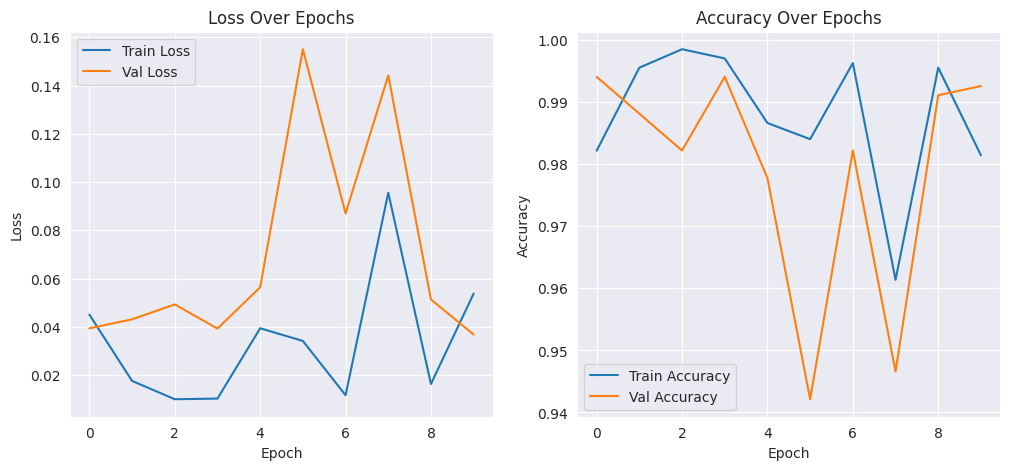

In [49]:
# Plot the model_histroy after fitting the best_model with X_train_ds and X_val_ds
plot_model_histroy(history)

Here is a table visualising the overall accuracy and loss over the 10 epochs 

In [50]:
history_model = pd.DataFrame(best_model.history.history)
history_model

,accuracy,loss,val_accuracy,val_loss
0,0.982169,0.045069,0.994065,0.039385
1,0.995542,0.017597,0.988131,0.043124
2,0.998514,0.010001,0.982196,0.049300
3,0.997028,0.010260,0.994065,0.039285
4,0.986627,0.039416,0.977745,0.056398
5,0.984027,0.034161,0.942137,0.155079
6,0.996285,0.011657,0.982196,0.086996
7,0.961367,0.095586,0.946588,0.144195
8,0.995542,0.016322,0.991098,0.051329
9,0.981426,0.053801,0.992582,0.036813


### Confusion Matrix and Classification Report


In [ ]:
# get prediction probabilities
y_pred_probs = best_model.predict(X_test_ds)
# Convert predictions to binary
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


In [91]:
# Retrieve true labels
y_true = y_test_encoded

In [90]:
# import confusion matrix and classifcation report

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Create classification and confusion matrix function

def create_conf_matrix_and_class_report(y_true_labels, prediciton):
    
    # Classification Report
    print('Classificaton Report:\n')
    print(classification_report(y_true_labels, prediciton))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_true_labels, prediciton)
    conf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    conf_disp.plot()

### Confusion Matrix and Classification Report Analysis

- The model performance is very promising and is generalising very well. 
- It made in total 3 wrong predictions out of 842 samples. (All false positives predicting 1[powdery_mildew] instead of 0[healthy])
- No false negatives were predicted showing excellent recall on powdery_mildew classes (class 1).

Classificaton Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       407
           1       0.99      1.00      1.00       435

    accuracy                           1.00       842
   macro avg       1.00      1.00      1.00       842
weighted avg       1.00      1.00      1.00       842



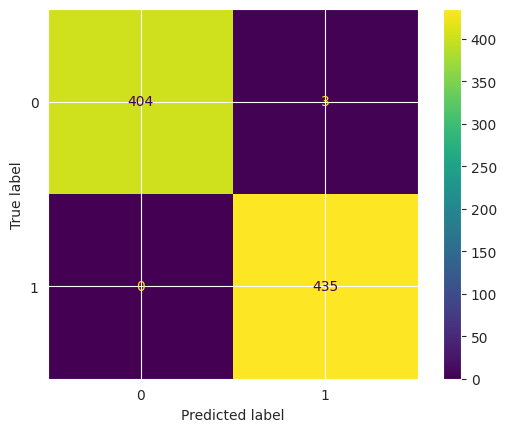

In [53]:
create_conf_matrix_and_class_report(y_true, y_pred)

### Create Final Model

In [57]:
# Check best hps for final model
print(best_hps.values)

{'filters': 32, 'add_third_conv': True, 'units': 256, 'learning_rate': 0.001, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}


In [58]:
# # Create keras model using hyper parameters from best model:

def create_tf_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(100, 100, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

In [59]:
model = create_tf_model()
model.summary()

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,105 (3.20 MB)

 Trainable params: 839,105 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

### Cross Validation Search

- I will use a Cross Validation search to train my model on different subsets, the method I will be using is the Startified K-Fold method.
- Using the Stratified K-fold method will help me confirm the consistency of its performance across the whole dataset.


In [60]:
# Stratified K-fold Method for Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# x
image_paths = np.array(X_train['image_path'].values)

# y
k_fold_labels = np.array(y_train_encoded)

#Set up the K-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# To store metric data
fold_accuracies = []

for fold, (train_index, val_index) in enumerate(skf.split(image_paths, k_fold_labels)):
    print(f'\n--- Fold {fold + 1} ---')

    #split the data
    train_paths, val_paths =  image_paths[train_index], image_paths[val_index]
    train_labels, val_labels = k_fold_labels[train_index], k_fold_labels[val_index]

    #Convert to tensors
    train_paths_tensor = tf.constant(train_paths)
    val_paths_tensors = tf.constant(val_paths)

    train_labels_tensor = tf.constant(train_labels)
    val_labels_tensors = tf.constant(val_labels)

    # Create tf.data.dataset

    k_fold_train_ds = (
        tf.data.Dataset.from_tensor_slices((train_paths_tensor, train_labels_tensor))
        .map(preprocess_image, num_parallel_calls=AUTOTUNE)
        .shuffle(len(train_paths), seed=SEED)
        .batch(64)
        .prefetch(AUTOTUNE)
    )

    k_fold_val_ds = (
        tf.data.Dataset.from_tensor_slices((val_paths_tensors, val_labels_tensors))
        .map(preprocess_image, num_parallel_calls=AUTOTUNE)
        .batch(64)
        .prefetch(AUTOTUNE)
    )

    model = create_tf_model()

    model.fit(k_fold_train_ds, validation_data=k_fold_val_ds, epochs=10, verbose=2)

    # Evaluate using validation dataset for cross validation
    loss, accuracy = model.evaluate(k_fold_val_ds, verbose=2)
    print(f'Fold {fold + 1} Validation Accuracy: {accuracy:.4f}')
    fold_accuracies.append(accuracy)

print(f'\n Average Accuracy across folds: {np.mean(fold_accuracies):.4f}')


--- Fold 1 ---
Epoch 1/10


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 - 15s - 444ms/step - accuracy: 0.7464 - loss: 0.5268 - val_accuracy: 0.9184 - val_loss: 0.2823
Epoch 2/10
34/34 - 13s - 394ms/step - accuracy: 0.9145 - loss: 0.2004 - val_accuracy: 0.9592 - val_loss: 0.1506
Epoch 3/10
34/34 - 13s - 387ms/step - accuracy: 0.9508 - loss: 0.1097 - val_accuracy: 0.9351 - val_loss: 0.1600
Epoch 4/10
34/34 - 12s - 365ms/step - accuracy: 0.9777 - loss: 0.0595 - val_accuracy: 0.9796 - val_loss: 0.0670
Epoch 5/10
34/34 - 13s - 370ms/step - accuracy: 0.9842 - loss: 0.0388 - val_accuracy: 0.9963 - val_loss: 0.0230
Epoch 6/10
34/34 - 13s - 371ms/step - accuracy: 0.9958 - loss: 0.0157 - val_accuracy: 0.9907 - val_loss: 0.0298
Epoch 7/10
34/34 - 12s - 361ms/step - accuracy: 0.9926 - loss: 0.0184 - val_accuracy: 0.9907 - val_loss: 0.0322
Epoch 8/10
34/34 - 12s - 359ms/step - accuracy: 0.9963 - loss: 0.0107 - val_accuracy: 0.9944 - val_loss: 0.0171
Epoch 9/10
34/34 - 13s - 368ms/step - accuracy: 0.9958 - loss: 0.0100 - val_accuracy: 0.9926 - val_loss: 0.0224
Epo

### Check results of Cross Validation

- Hyperparameters are tuned well.
- The model is generalising well and there is no sign of fold dependent overfitting.
- Dataset structure will also be helping the model perform so well. 
- Average Accuracy is 99.59% well above the 97% business requirement.

In [61]:
cross_val_results_df = pd.DataFrame({
    'Fold': list(range(1, len(fold_accuracies) + 1)),
    'Validation Accuracy': fold_accuracies
})

print(cross_val_results_df)
print(f'\n Average Accuracy: {cross_val_results_df["Validation Accuracy"].mean():.4f}')

   Fold  Validation Accuracy
0     1             0.988868
1     2             1.000000
2     3             0.994424
3     4             0.996283
4     5             1.000000

 Average Accuracy: 0.9959


In [62]:
# Save results

cross_val_results_df.to_csv('cross_validation_results.csv', index=False)

### Predict Using Test Dataset

The results from predicting on the test dataset are promising. 
- It does not meet the 97% accuracy requirement, however the data will be retrained using the full train and validation sets. 
- From previous analysis I am confident the model will meet the required output of at least 97% accuracy as it is only 96% currently. 
- All healthy classes [0] were predicted correctly.


In [63]:
# get prediction probabilities
model_pred_probs = model.predict(X_test_ds)
# Convert predictions to binary
model_pred = (model_pred_probs > 0.5).astype("int32").flatten()
# Retrieve true labels
y_true = y_test_encoded

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step


### Confusion Matrix and Classification Report:

- The model has performed very well on the test_ds. 
- There is only 1 wrong predictions out of 842 samples. (A False Positive only)
- The test set achieved perfect results. 

Classificaton Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       435

    accuracy                           1.00       842
   macro avg       1.00      1.00      1.00       842
weighted avg       1.00      1.00      1.00       842



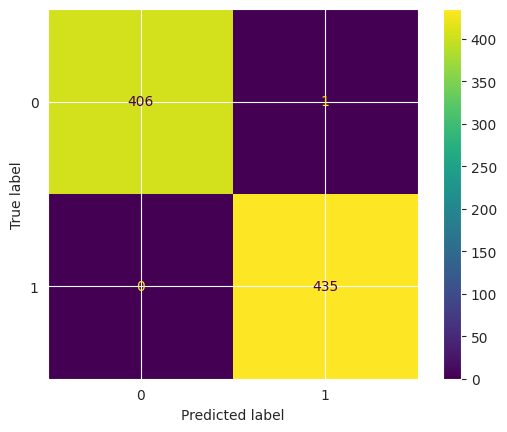

In [64]:
create_conf_matrix_and_class_report(y_true_labels=y_true, prediciton=model_pred)

---

# Final Model

In [114]:
# If wanting to load model later use: uncomment when needed
# Load final model, if no model exsits continue with workflow
final_model = load_model('cherry_leaf_classifier_final_model.h5')

In [115]:
# If wanting to load model later use: uncomment when needed
# Handle warning message
final_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',         
    metrics=['accuracy']
)

### Train Model with all Train and Validation data
- The model will now be trained using all of the train set and validation set data.

In [99]:
# Create full_train_ds

# Get all image path and class labels
full_train_paths = np.concatenate([X_train['image_path'].values, X_val['image_path'].values])
full_train_labels = np.concatenate([y_train_encoded, y_val_encoded])

In [100]:
# Turn the image paths and labels into tensors
full_train_paths_tensor = tf.constant(full_train_paths)
full_train_labels_tensor = tf.constant(full_train_labels)

In [101]:
# Create full_train_ds

full_train_ds = (tf.data.Dataset.from_tensor_slices((full_train_paths_tensor, full_train_labels_tensor))
                 .map(preprocess_image, num_parallel_calls=AUTOTUNE)
                 .map(augment_image, num_parallel_calls=AUTOTUNE)
                 .shuffle(len(full_train_paths), seed=SEED)
                 .batch(64)
                 .prefetch(AUTOTUNE)
            )

Now the full length training dataset has been created, it can be fitted to the final model.

In [72]:
# Create Final Model

final_model = create_tf_model()

history = final_model.fit(full_train_ds, epochs=10, verbose=2, callbacks=[stop_early])

Epoch 1/10


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 - 40s - 748ms/step - accuracy: 0.7733 - loss: 0.4839
Epoch 2/10


/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


53/53 - 26s - 485ms/step - accuracy: 0.9242 - loss: 0.1791
Epoch 3/10
53/53 - 26s - 485ms/step - accuracy: 0.9623 - loss: 0.0964
Epoch 4/10
53/53 - 25s - 481ms/step - accuracy: 0.9661 - loss: 0.0855
Epoch 5/10
53/53 - 26s - 498ms/step - accuracy: 0.9869 - loss: 0.0436
Epoch 6/10
53/53 - 27s - 515ms/step - accuracy: 0.9902 - loss: 0.0274
Epoch 7/10
53/53 - 26s - 483ms/step - accuracy: 0.9920 - loss: 0.0282
Epoch 8/10
53/53 - 25s - 479ms/step - accuracy: 0.9929 - loss: 0.0212
Epoch 9/10
53/53 - 25s - 476ms/step - accuracy: 0.9890 - loss: 0.0278
Epoch 10/10
53/53 - 25s - 477ms/step - accuracy: 0.9949 - loss: 0.0160


In [73]:
# Convert history to DataFrame
history_df = pd.DataFrame(history.history) 

# Save as CSV file
history_df.to_csv('final_model_history')

In [110]:
# If wanting to load history later use: uncomment when needed
# Load History
history_df = pd.read_csv('final_model_history', index_col=0)

### Analyse History Data

In [111]:
# plot accuracy and loss

def plot_history_for_final_model(history_df):
    if hasattr(history_df, 'history'):
        history = history_df.history
    else:
        history = history_df
        
    plt.figure(figsize=(10,6))

    # Plot for loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Train Loss')
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot for accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.title('Training Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()


##### Plot History Analysis 

- The plot results show there is no overfitting.
- The training loss drops sharply and becomes stable reaching a maximum low of 0.016.
- The training accuracy sharply increase and reaches a maximuim of 0.9949 meeting the business requirement of at least 97% accuracy.

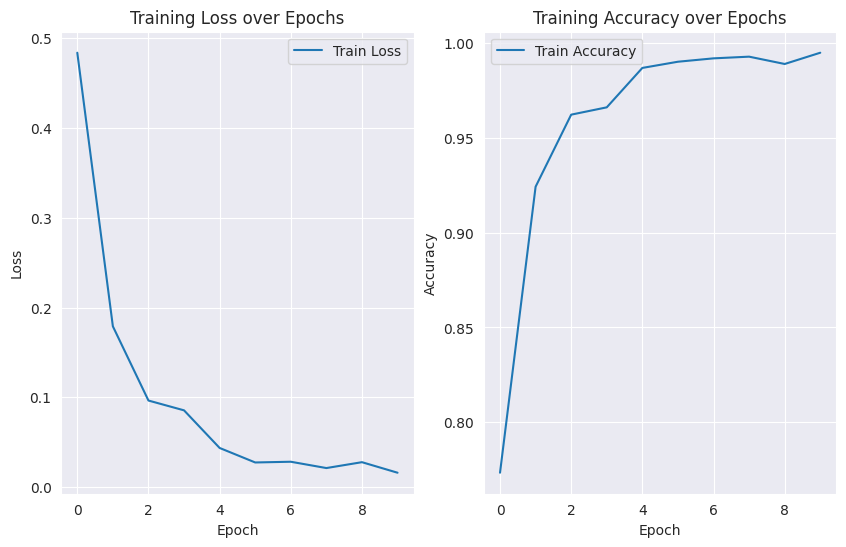

In [112]:
plot_history_for_final_model(history_df)

In [ ]:
# Save the results
plt.savefig('final_model_history_training.png')

### Analyse Final Model Performance Results

I will next evaluate the model on the test data set.

In [117]:
final_model.evaluate(X_test_ds, verbose=2)

14/14 - 2s - 167ms/step - accuracy: 0.9917 - loss: 0.0582


[0.058201294392347336, 0.9916864633560181]

Confusion Matrix and Classification Report

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
Classificaton Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       407
           1       0.98      1.00      0.99       435

    accuracy                           0.99       842
   macro avg       0.99      0.99      0.99       842
weighted avg       0.99      0.99      0.99       842



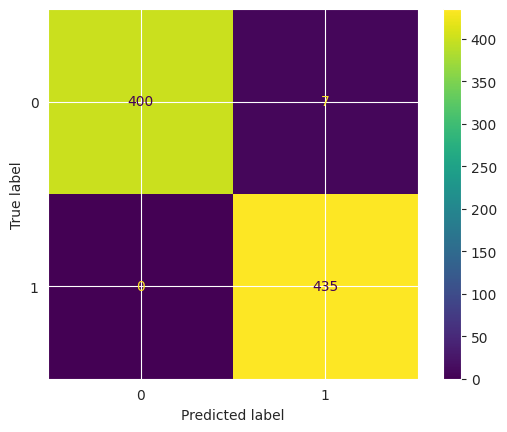

In [118]:
final_prediction = final_model.predict(X_test_ds)
final_prediction_labels = (final_prediction > 0.5).astype("int32").flatten()
create_conf_matrix_and_class_report(y_true_labels=y_true, prediciton=final_prediction_labels)

---

# Save Final Model

In [77]:
# Save final model
final_model.save('cherry_leaf_classifier_final_model.h5')

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)
